# Sistemas Não-Lineares

Agora que vimos tanto zeros de funções e sistemas lineares, estamos prontos para um tópico que é a convergência destes dois: sistemas não-lineares.

Um sistemas não-linear é um conjunto de equações num conjunto de variáveis. Se essas equações fossem lineares, o sistema seria linear, e essa é a diferença entre os dois.

Na prática, essa pequena diferença faz muita diferença. Veja o sistema abaixo:

$$
\left\{\begin{array}{rcl}
x^2 + y^2 & = & 5 \\
xy & = & 2.
\end{array}\right.$$

In [1]:
using Plots
pyplot(size=(400,300))

Plots.PyPlotBackend()


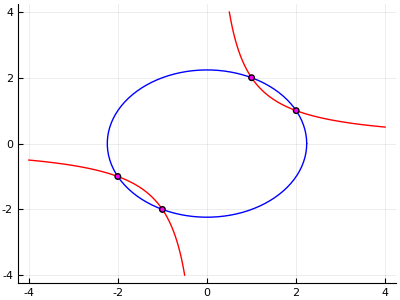

In [2]:
t = linspace(0, 2pi, 100)
x = linspace(0.5, 4, 100)
plot(sqrt(5) * cos.(t), sqrt(5) * sin.(t), c=:blue, leg=false)
plot!(x, 2 ./ x, c=:red)
plot!(-x, -2./x, c=:red)
scatter!([1;2;-1;-2], [2;1;-2;-1], c=:magenta, ms=4)

Esse sistema tem 4 soluções, apesar de ter exatamente 2 variáveis e 2 equações. Isso difere bastante dos sistemas lineares.

De uma maneira geral não é possível dizer se um sistema não-linear terá uma, várias, infinitas, ou nenhuma solução.
No entanto, nesta parte da disciplina, iremos supor que o sistema tem ao menos uma solução.

Matematicamente, podemos descrever o sistema não-linear utilizando $m$ funções de $n$ variáveis.

$$
\left\{\begin{array}{rcl}
f_1(x_1,x_2,\dots,x_n) & = & 0, \\
f_2(x_1,x_2,\dots,x_n) & = & 0, \\
\vdots &  & \vdots \\
f_m(x_1,x_2,\dots,x_n) & = & 0.
\end{array}\right.$$

No exemplo acima, temos $m = n = 2$, e $f_1(x,y) = x^2 + y^2 - 5$ e $f_2(x,y) = xy - 2$.

## Método de Newton

Nesta seção, iremos supor que $m = n$. Essa é uma condição necessária para começar o desenvolvimento de métodos para resolver este problema.

Se $m = n = 1$, poderíamos utilizar o método de Newton para resolver esse sistema. Aqui, no entanto, iremos sempre considerar $m = n > 1$. No entanto, a ideia básica do método de Newton pode ser usada, que é utilizar aproximações lineares das funções.

Considerando uma função diferenciável $f(x,y)$ e um ponto $(a,b)$, definimos a aproximação linear de $f$ em torno de $(a,b)$ como a função
$$ L(x,y) = f(a,b) + \frac{\partial f}{\partial x}(a,b)(x - a) + \frac{\partial f}{\partial y}(a,b)(y - b). $$


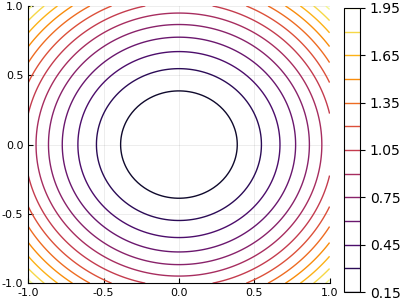

In [3]:
f(x,y) = x^2 + y^2
contour(linspace(-1, 1, 100), linspace(-1, 1, 100), f)

/home/abel/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)



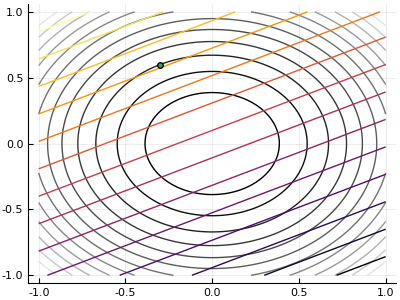

In [4]:
dfx(x,y) = 2x
dfy(x,y) = 2y
a, b  = -0.3, 0.6
L(x,y) = f(a,b) + dfx(a,b) * (x - a) + dfy(a,b) * (y - a)
contour(linspace(-1, 1, 100), linspace(-1, 1, 100), f, c=:gray, leg=false)
contour!(linspace(-1, 1, 100), linspace(-1, 1, 100), L)
scatter!([a],[b])

No nosso exemplo, com $f_1(x,y) = x^2 + y^2 - 5$ e $f_2(x,y) = xy - 2$, as aproximações lineares em torno do ponto $(3,2)$ serão
$$ L_1(x,y) = 8 + 6(x - 3) + 4(y - 2), $$
e
$$ L_2(x,y) = 4 + 2(x - 3) + 3(y - 2). $$

Aproximando as equações $f_1(x,y) = 0$ e $f_2(x,y) = 0$, por $L_1(x,y) = 0$ e $L_2(x,y) = 0$, temos


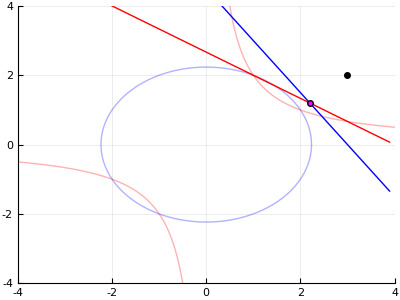

In [5]:
t = linspace(0, 2pi, 100)
x = linspace(0.5, 4, 100)
plot(sqrt(5) * cos.(t), sqrt(5) * sin.(t), c=:blue, alpha=0.3, leg=false)
plot!(x, 2 ./ x, c=:red, alpha=0.3)
plot!(-x, -2./x, c=:red, alpha=0.3)
#scatter!([1;2;-1;-2], [2;1;-2;-1], c=:magenta, ms=4)
scatter!([3], [2], c=:black, ms=4)
plot!(x->(18 - 6x)/4, -4, 4, c=:blue)
plot!(x->(8 - 2x)/3, -4, 4, c=:red)
xlims!(-4, 4)
ylims!(-4, 4)
scatter!([2.2], [1.2], c=:magenta, ms=4)

Essa nova aproximação, $(x,y) = (2.2,1.2)$ está bem mais próxima de uma solução do sistema não-linear, assim como acontece com o método de Newton para zeros de funções.

Generalizando, se temos uma função $f_i(x_1,x_2,\dots,x_n)$, com $i = 1,\dots,m$, sua aproximação linear em torno do ponto $a = (a_1,\dots,a_n)$ será
$$
L_i(x_1,\dots,x_n) = f_i(x_1,\dots,x_n) +
\frac{\partial f_i}{\partial x_1}(a_1,\dots,a_n)(x_1 - a_1) +
\frac{\partial f_i}{\partial x_2}(a_1,\dots,a_n)(x_2 - a_2) +
\cdots +
\frac{\partial f_i}{\partial x_n}(a_1,\dots,a_n)(x_n - a_n).
$$

Escrevendo $x = (x_1,\dots,x_n)$, e lembrando que
$$ \nabla f(x) = \left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1} \\
\vdots \\
\dfrac{\partial f}{\partial x_n}
\end{array}\right], $$
temos
$$
L_i(x) = f_i(a) + \nabla f_i(a)^T(x - a).
$$

Sendo assim, o método de Newton, consiste em
- começar com uma aproximação $x^0$ (o índice não é potência);
- para cada $k$, começando com $k = 0$, encontrar as aproximações lineares $L_1,\dots,L_n$ em torno de $x^k$;
- e definir $x^{k+1}$ como a solução do sistema **linear**
$$\left\{\begin{array}{rcl}
L_1(x) & = & 0, \\
\vdots \\
L_n(x) & = & 0.
\end{array}\right.$$

Esse sistema linear é
$$\left\{\begin{array}{rcl}
f_1(x^k) + \nabla f_1(x^k)^T(x - x^k) & = & 0, \\
\vdots \\
f_n(x^k) + \nabla f_n(x^k)^T(x - x^k) & = & 0,
\end{array}\right.$$
que podemos escrever matricialmente definindo a matrix
$$ J(x) = \left[\begin{array}{c}
\nabla f_1(x)^T \\
\vdots \\
\nabla f_n(x)^T
\end{array}\right]
= \left[\begin{array}{c}
\dfrac{\partial f_1}{\partial x_1} &
\cdots &
\dfrac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\dfrac{\partial f_n}{\partial x_1} &
\cdots &
\dfrac{\partial f_n}{\partial x_n}
\end{array}\right].
$$

Mas veja que essa matriz é conhecida. É a matriz Jacobiana da função
$$ F(x) = \left[\begin{array}{c}
f_1(x) \\ \vdots \\ f_n(x)
\end{array}\right]. $$
Não por acaso, o sistema vira
$$ J(x^k)(x - x^k) = -F(x^k). $$

Computacionalmente, é interessante escrever como
$$
\left\{\begin{array}{rcl}
J(x^k)d^k & = & -F(x^k), \\
x^{k+1} & = & x^k + d^k.
\end{array}\right.
$$

In [6]:
F(x) = [x[1]^2 + x[2]^2 - 5;
        x[1] * x[2] - 2]
J(x) = [2*x[1]  2*x[2];
        x[2]    x[1]]
x = [3;2]
d = -J(x) \ F(x)
x = x + d

2-element Array{Float64,1}:
 2.2
 1.2

In [7]:
F(x)

2-element Array{Float64,1}:
 1.28
 0.64

Repetindo

In [8]:
d = -J(x) \ F(x)
x = x + d

2-element Array{Float64,1}:
 2.01176
 1.01176

In [9]:
F(x)

2-element Array{Float64,1}:
 0.0708651
 0.0354325

Como queremos $F(x) = 0$, para parar utilizaremos a norma de $F(x^k)$ comparado à uma tolerância dada. Além disso,
também colocamos um limite de iterações, por exemplo, para evitar o loop infinito.

In [10]:
norm(F(x))

0.0792295366422073

In [11]:
function newton_snl(F, J, x; tol = 1e-6, maxiter = 10_000)
    # Implemente usando \
    return x, Fx, iter # Fx é o valor da F em x
end

newton_snl (generic function with 1 method)

In [12]:
F(x) = [x[1]^2 + x[2]^2 - 5;
        x[1] * x[2] - 2]
J(x) = [2*x[1]  2*x[2];
        x[2]    x[1]]
x = [3;2]
x, Fx = newton_snl(F, J, x)

LoadError: [91mUndefVarError: Fx not defined[39m

Um ponto importante aqui, é que nada impede que a matriz $J(x^k)$ seja singular, isto é, não tenha inversa. Nesse caso, o método de Newton acima não está bem definido.
Por isso, na hora de resolver o sistema, devemos utilizar um método que indique se a solução foi bem sucedida ou não.

In [13]:
function newton_snl(F, J, x; tol = 1e-6, maxiter = 10_000)
    # Implemente usando a sua função de eliminação gaussiana ou LU,
    # com uma modificação para checar se a matriz J(x^k) tem inversa
    return x, Fx, iter, ef # ef é 0 se o método convergiu e 1 se J(x^k) não tem inversa
end

newton_snl (generic function with 1 method)

Para evitar de parar o método quando a Jacobiana é singular, existem alguns métodos que aproximam a Jacobiana. Não iremos estudá-los aqui, no entanto.

## O caso $m \neq n$ e quadrados mínimos

Quando $m \neq n$, ainda pode existir uma solução para o sistema, porém o método de Newton não funciona mais, pois a matriz Jacobiana não é quadrada. No entanto, podemos considerar um problema parecido, que é o de minimizar a norma de $F(x)$, isto é,
$$ \min \Vert F(x)\Vert^2. $$

Existem alguns métodos para esse problema que encontram $F(x) = 0$, mesmo se não temos $m = n$.
Além disso, se não temos $F(x) = 0$, também pode ser interessante encontrar qual o valor mais próximo de zero.
Esse é o problema de quadrados mínimos não-lineares. Uma ideia para tentar resolvê-lo é também fazer a aproximação linear de $F$ em torno de $x^k$, obtendo
$$ \min \Vert F(x^k) + J(x^k)d\Vert^2. $$

Encontrando $d^k$, fazemos $x^{k+1} = x^k + d^k$. Note que esse problema é o problema de quadrados mínimos lineares.

## O Fractal de Newton

Assim como tivemos para funções reais, podemos ter várias soluções para $F(x) = 0$ se $F$ é uma função de várias variáveis. O ponto para o qual essa função irá convergir dependerá do ponto inicial do algoritmo.

Considere a seguinte função nos complexos: $f:\mathbb{C}\to\mathbb{C}$ dada por $f(z) = z^3 - 1$.

Nos reais a solução de $x^3 = 1$ é apenas $x = 1$, porém, nos complexos, temos também as soluções
$z = -\frac{1}{2} \pm \frac{\sqrt{3}}{2}i$. De maneira mais simples, temos 3 soluções
$z = \cos(\theta) + i\sin(\theta)$ onde $\theta = 0, \frac{2\pi}{3}, \frac{4\pi}{3}$.

Podemos pensar, no entanto, que $z = x + yi$, e imaginar que a equação $z^3 = 1$ corresponde a duas equações: a parte real de $z^3$ igual a 1, e a parte complexo de $z^3$ igual a 0. Veja que
$$ z^3 = (x + iy)^3 = x^3 + 3x^2yi - 3xy^2 - y^3i = (x^3 - 3xy^2) + (3x^2y - y^3)i, $$
logo, obtemos o sistema
$$\left\{\begin{array}{rcl}
x^3 - 3xy^2 - 1 & = & 0 \\
3x^2y - y^3 & = & 0.
\end{array}\right.$$

In [14]:
F(x) = [x[1]^3 - 3 * x[1] * x[2]^2 - 1; 3 * x[1]^2 * x[2] - x[2]^3]
J(x) = [3 * x[1]^2 - 3 * x[2]^2    -6 * x[1] * x[2];
        6 * x[1] * x[2]    3 * x[1]^2 - 3 * x[2]^2]

J (generic function with 1 method)

In [15]:
x = ones(2)

2-element Array{Float64,1}:
 1.0
 1.0

In [16]:
d = -J(x) \ F(x)
x += d

2-element Array{Float64,1}:
 0.666667
 0.5     


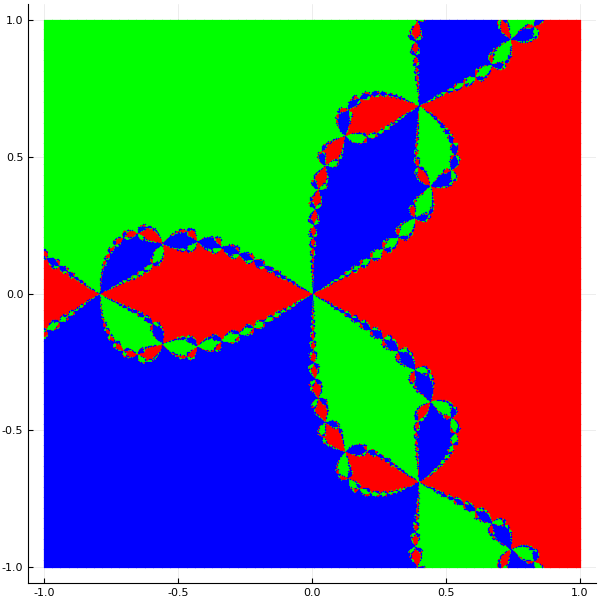

In [18]:
N = 600
pyplot(size=(N,N))
M = zeros(Int, N, N)
t = linspace(-1, 1, N)
for i = 1:N
    for j = 1:N
        x = [t[i]; t[j]]
        s, Fs, k, ef = newton_snl(F, J, x)
        if ef == 1
            continue
        end
        for (r,θ) in enumerate([0; 2π/3; 4π/3])
            if norm(s - [cos(θ); sin(θ)]) < 1e-1
                M[i,j] = r
                break
            end
        end
    end
end

scatter(leg=false)
colors = [:black, RGB(1.0,0.0,0.0), RGB(0.0,1.0,0.0), RGB(0.0,0.0,1.0)]
for (i,c) in enumerate(colors)
    I = find(M .== i - 1)
    scatter!(t[(I - 1) .% N + 1], t[div.(I - 1, N) + 1], c=c, ms=1, m=(stroke(0)))
end
scatter!()


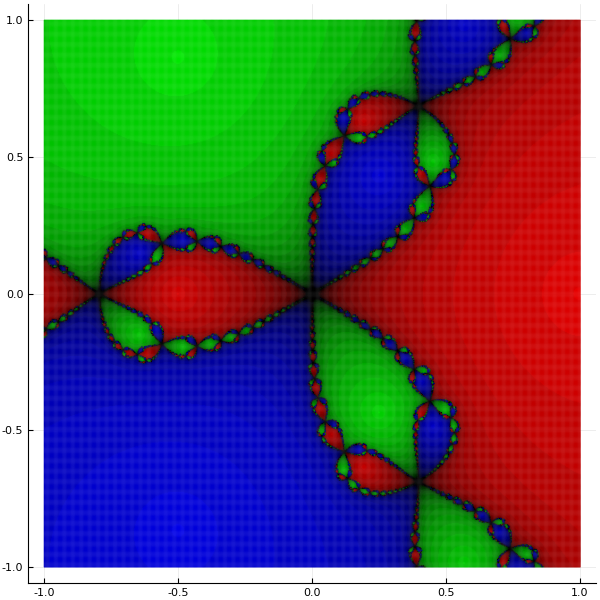

In [19]:
N = 600
pyplot(size=(N,N))
M = zeros(Int, N, N)
K = zeros(N, N)
t = linspace(-1, 1, N)
for i = 1:N
    for j = 1:N
        x = [t[i]; t[j]]
        s, Fs, k, ef = newton_snl(F, J, x, maxiter=20)
        if ef == 1
            continue
        end
        for (r,θ) in enumerate([0; 2π/3; 4π/3])
            if norm(s - [cos(θ); sin(θ)]) < 1e-1
                M[i,j] = r
                K[i,j] = k / 21
                break
            end
        end
    end
end

scatter(leg=false)
colors = [:black, :blue, :red, :green]
for i = 1:4
    I = find(M .== i - 1)
    s = 1 - K[I]
    c = RGB.( (i == 2) * s, (i == 3) * s, (i == 4) * s)
    scatter!(t[(I - 1) .% N + 1], t[div.(I - 1, N) + 1], c=c, ms=1, m=(stroke(0)))
end
scatter!()